In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [99]:
jacobs_ethnicities.dropna(inplace=True)

## Finding proportion of women/URMs through all top majors at Jacobs and compare it to Jacobs

In [100]:
top_majors = ['L&S Computer Science', 'Mechanical Engineering', 'Electrical Eng & Comp Sci', 'Cognitive Science', 'Letters & Sci Undeclared', 'Architecture']
majors = student_majors.groupby('ppsk').last().reset_index()

def add_major(df):
    temp = df[:]
    na_majors = df[df['major'].isna()].merge(stem_paths[['major.intended.department','ppsk']], on ='ppsk')
    new_temp = temp.merge(na_majors[['ppsk','major.intended.department']], on='ppsk', how='left').drop_duplicates()
    new_temp['major'].fillna(value = new_temp['major.intended.department'],inplace=True)
    return new_temp.drop('major.intended.department', axis=1)

In [130]:
prop_berkeley = student_courses[['ppsk']].drop_duplicates().merge(stem_paths[['ppsk', 'ethnic.l1','ethnic.l2','ethnic.l3','gender']], on='ppsk', how='inner').merge(majors[['ppsk','major',]], how='left').drop_duplicates()
prop_berkeley = add_major(prop_berkeley)
prop_berkeley = prop_berkeley[prop_berkeley['major'].isin(top_majors)]
prop_berkeley

,ppsk,ethnic.l1,ethnic.l2,ethnic.l3,gender,major
3,731964,White/Other,White,White,Male,Mechanical Engineering
52,826065,White/Other,White,White,Male,L&S Computer Science
55,832181,International,International,International,Male,L&S Computer Science
72,680369,White/Other,White,White,Male,Architecture
78,695918,White/Other,White,White,Male,L&S Computer Science
...,...,...,...,...,...,...
80291,2727864,Asian/Pacific Islander,Asian,Chinese,Male,Electrical Eng & Comp Sci
80300,2632309,White/Other,White,White,Male,Letters & Sci Undeclared
80301,1315825,Asian/Pacific Islander,Asian,Chinese,Male,Letters & Sci Undeclared
80305,2632260,White/Other,White,White,Female,Letters & Sci Undeclared


In [136]:
berk_women_prop = prop_berkeley.groupby(['major', 'gender']).count().unstack()['ppsk']
berk_women_prop['Total'] = berk_women_prop.sum(axis=1)
berk_women_prop['Women Proportion'] = berk_women_prop['Female']/berk_women_prop['Total']
berk_women_prop.sort_values(by='Women Proportion',ascending=False,inplace=True)
berk_women_prop

Index(['Cognitive Science', 'Architecture', 'Letters & Sci Undeclared',
       'L&S Computer Science', 'Electrical Eng & Comp Sci',
       'Mechanical Engineering'],
      dtype='object', name='major')

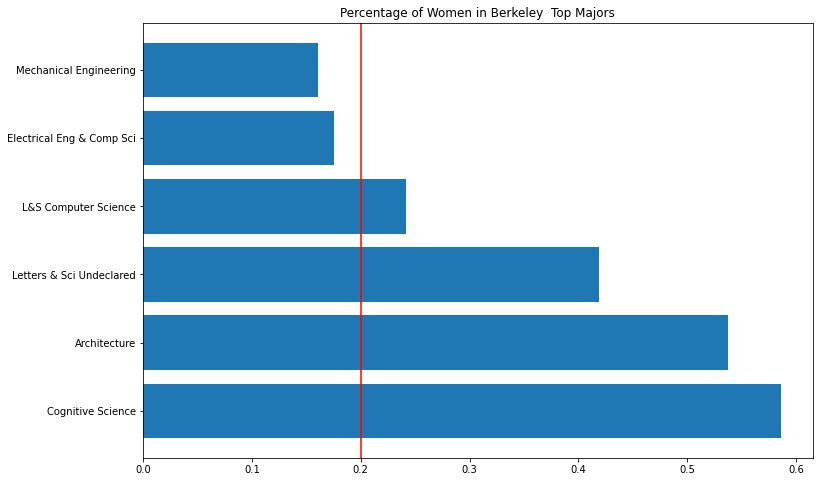

In [149]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(berk_women_prop.index,'Women Proportion', data=berk_women_prop)
ax.set_title("Percentage of Women in Berkeley ")
ax.axvline(x = .2,color='r')

In [168]:
jacobs_ethnicities.groupby('gender')[['ppsk']].count().transpose().plot(kind='pie')

ValueError: pie requires either y column or 'subplots=True'

In [103]:
prop_berkeley

,ppsk,ethnic.l1,ethnic.l2,ethnic.l3,gender,major
3,731964,White/Other,White,White,Male,Mechanical Engineering
52,826065,White/Other,White,White,Male,L&S Computer Science
55,832181,International,International,International,Male,L&S Computer Science
72,680369,White/Other,White,White,Male,Architecture
78,695918,White/Other,White,White,Male,L&S Computer Science
...,...,...,...,...,...,...
80291,2727864,Asian/Pacific Islander,Asian,Chinese,Male,Electrical Eng & Comp Sci
80300,2632309,White/Other,White,White,Male,Letters & Sci Undeclared
80301,1315825,Asian/Pacific Islander,Asian,Chinese,Male,Letters & Sci Undeclared
80305,2632260,White/Other,White,White,Female,Letters & Sci Undeclared
